In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Creating sample dataset
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 11, 30).reshape(-1, 1)  # Years of Experience
Y = 1000 * (X**2) + 5000 * X + np.random.randint(5000, 10000, X.shape)  # Salary with non-linear relation

# Convert to DataFrame
data = pd.DataFrame({'YearsExperience': X.flatten(), 'Salary': Y.flatten()})
data.head()  # Display first few rows

,YearsExperience,Salary
0,7,90528
1,4,44202
2,8,112556
3,5,58890
4,7,89646


In [3]:
# Splitting into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Transforming X for Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Display coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [6207.23863675]
Coefficients: [[   0.         5284.87674528  985.54101201]]


In [5]:
# Predict on test data
Y_pred = model.predict(X_test_poly)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
comparison.head()

,Actual,Predicted
0,31613,30931.737981
1,56478,57270.147663
2,74943,73395.975541
3,109775,111560.877368
4,111363,111560.877368


In [6]:
# Calculate model performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error:', mse)
print('R² Score:', r2)


Mean Squared Error: 1126192.784519108
R² Score: 0.9986661924100065


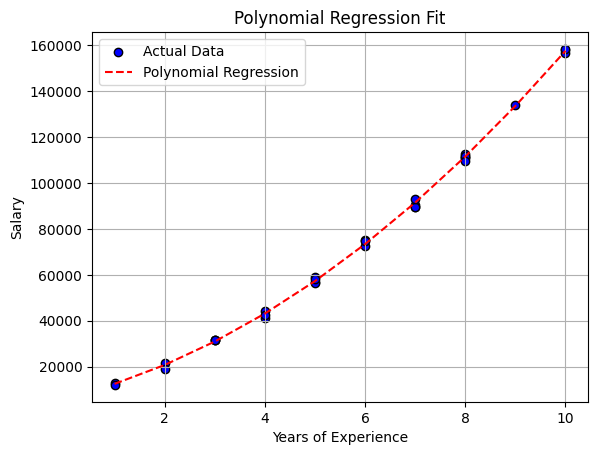

<Figure size 800x500 with 0 Axes>

In [7]:

X_sorted = np.sort(X, axis=0)
Y_poly_pred = model.predict(poly.transform(X_sorted))

# Plot data points and regression curve

plt.scatter(X, Y, color='blue', edgecolors='k', label='Actual Data')
plt.plot(X_sorted, Y_poly_pred, color='red', linestyle='dashed', label='Polynomial Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.figure(figsize=(8, 5))
plt.show()